# MSE Simulation
This notebook simulates the the BBOB functions F1, F3 and F24 by training a NN with MSE Loss. Therefore this follows a classical estimation approach.

In [3]:
import sys
sys.path.append("../")

from utils.utils import plot_simulated_meshgrid, plot_collage
import model
from utils import gt_sampling

import numpy as np
import torch
import bbobtorch

## F01

In [4]:
# create ground truth functions
n_dim = 2
samples = 1000
seed = 42

torch.manual_seed(seed)
problem_f01 = bbobtorch.create_f01(n_dim, seed=seed)
# sampling from groundtruth functions
sample_f01 = gt_sampling.get_sample(problem_f01, n_samples=samples, n_dim=2, seed=42, method='random')
X_input = sample_f01[0]

c:\Users\schla\OptimizationTestfunctionGeneration\main\..\utils\gt_sampling.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_sample = torch.tensor(result[i], dtype=torch.float64).reshape((1, n_dim)).float()


## Simulate the function with NN

In [5]:
input_dim = 2
hidden_dim = 16
hidden_layers = 8
output_dim = 1

learning_rate = 1e-4
num_epochs = 1000

m = model.NN1(input_dim, hidden_dim, hidden_layers)
optimizer = torch.optim.SGD(m.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
y = bbobtorch.create_f01(2)(X_input)
mean, std = y.mean(), y.std()
# Training loop
for epoch in range(num_epochs):
    preds = m(X_input)
    preds = preds * std + mean
    Karloss = criterion(preds.flatten(), y.clone().detach().flatten())

    # Backward and optimize
    Karloss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {Karloss.item():.4f}')

Epoch [20/1000], Loss: 606.6855
Epoch [40/1000], Loss: 606.3444
Epoch [60/1000], Loss: 606.0355
Epoch [80/1000], Loss: 605.6371
Epoch [100/1000], Loss: 605.0861
Epoch [120/1000], Loss: 604.2575
Epoch [140/1000], Loss: 602.8940
Epoch [160/1000], Loss: 600.3132
Epoch [180/1000], Loss: 594.3295
Epoch [200/1000], Loss: 575.2701
Epoch [220/1000], Loss: 410.6425
Epoch [240/1000], Loss: 90.0159
Epoch [260/1000], Loss: 33.7836
Epoch [280/1000], Loss: 31.8639
Epoch [300/1000], Loss: 43.5665
Epoch [320/1000], Loss: 49.8204
Epoch [340/1000], Loss: 46.9944
Epoch [360/1000], Loss: 42.9189
Epoch [380/1000], Loss: 39.9218
Epoch [400/1000], Loss: 38.4746
Epoch [420/1000], Loss: 36.4279
Epoch [440/1000], Loss: 34.0651
Epoch [460/1000], Loss: 32.3268
Epoch [480/1000], Loss: 30.8146
Epoch [500/1000], Loss: 29.3288
Epoch [520/1000], Loss: 28.0367
Epoch [540/1000], Loss: 27.2071
Epoch [560/1000], Loss: 26.1366
Epoch [580/1000], Loss: 25.3040
Epoch [600/1000], Loss: 24.4212
Epoch [620/1000], Loss: 23.5315
E

In [6]:
# generate mesh grid for plotting
with torch.no_grad():
    x = np.linspace(-5.0, 5.0, 100)
    y = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(x, y)
    mesh_samples = np.c_[X.ravel(), Y.ravel()]
    mesh_samples_tensor = torch.tensor(mesh_samples, dtype=torch.float32)
    mesh_results = m(mesh_samples_tensor).reshape(X.shape)*std + mean
    mesh_results = mesh_results.numpy()[:, ::-1]

<Axes: title={'center': 'Simulated Function from NN'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

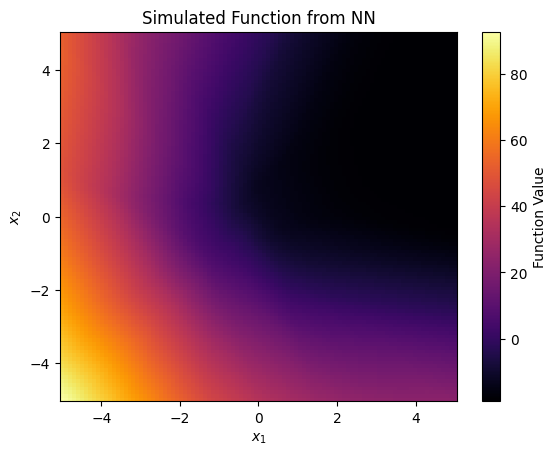

In [7]:
plot_simulated_meshgrid(X, -Y, mesh_results, model='NN')

c:\ProgramData\Anaconda3\envs\python-3-10-env\MachineLearningProjectTest\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


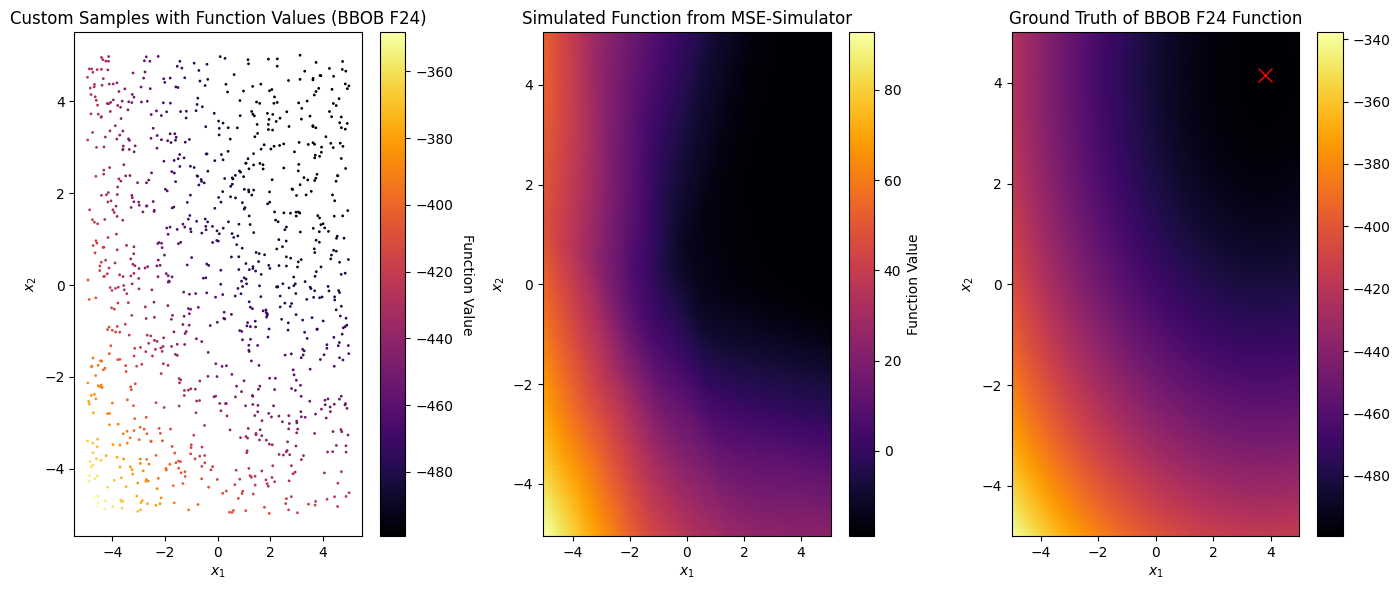

In [8]:
plot_collage(sample_f01[0].detach().numpy(), sample_f01[1].detach().numpy(), problem_f01, "BBOB F24", "MSE-Simulator", X, -Y, mesh_results);

In [9]:
sys.path.append("../")
torch.save(m.state_dict(), "../models/f01_mse_nn_model.pt")

-> on the first glance quite accurate simulation for BBOB01

## F03

In [10]:
# create ground truth functions
n_dim = 2
samples = 1000
seed = 42

torch.manual_seed(seed)
problem_f03 = bbobtorch.create_f03(n_dim, seed=seed)
# sampling from groundtruth functions
sample_f03 = gt_sampling.get_sample(problem_f03, n_samples=samples, n_dim=2, seed=42, method='random')
X_input = sample_f03[0]

## Simulate the function with NN

In [11]:
input_dim = 2
hidden_dim = 16
hidden_layers = 8
output_dim = 1

learning_rate = 1e-4
num_epochs = 1000

m = model.NN1(input_dim, hidden_dim, hidden_layers)
optimizer = torch.optim.SGD(m.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
y = bbobtorch.create_f03(2)(X_input)
mean, std = y.mean(), y.std()
# Training loop
for epoch in range(num_epochs):
    preds = m(X_input)
    preds = preds * std + mean
    Karloss = criterion(preds.flatten(), y.clone().detach().flatten())

    # Backward and optimize
    Karloss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {Karloss.item():.4f}')

Epoch [20/1000], Loss: nan
Epoch [40/1000], Loss: nan
Epoch [60/1000], Loss: nan
Epoch [80/1000], Loss: nan
Epoch [100/1000], Loss: nan
Epoch [120/1000], Loss: nan
Epoch [140/1000], Loss: nan
Epoch [160/1000], Loss: nan
Epoch [180/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [220/1000], Loss: nan
Epoch [240/1000], Loss: nan
Epoch [260/1000], Loss: nan
Epoch [280/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [320/1000], Loss: nan
Epoch [340/1000], Loss: nan
Epoch [360/1000], Loss: nan
Epoch [380/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [420/1000], Loss: nan
Epoch [440/1000], Loss: nan
Epoch [460/1000], Loss: nan
Epoch [480/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [520/1000], Loss: nan
Epoch [540/1000], Loss: nan
Epoch [560/1000], Loss: nan
Epoch [580/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [620/1000], Loss: nan
Epoch [640/1000], Loss: nan
Epoch [660/1000], Loss: nan
Epoch [680/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [720/1000], Loss: 

In [12]:
# generate mesh grid for plotting
with torch.no_grad():
    x = np.linspace(-5.0, 5.0, 100)
    y = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(x, y)
    mesh_samples = np.c_[X.ravel(), Y.ravel()]
    mesh_samples_tensor = torch.tensor(mesh_samples, dtype=torch.float32)
    mesh_results = m(mesh_samples_tensor).reshape(X.shape)*std + mean
    mesh_results = mesh_results.numpy()[:, ::-1]

<Axes: title={'center': 'Simulated Function from NN'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

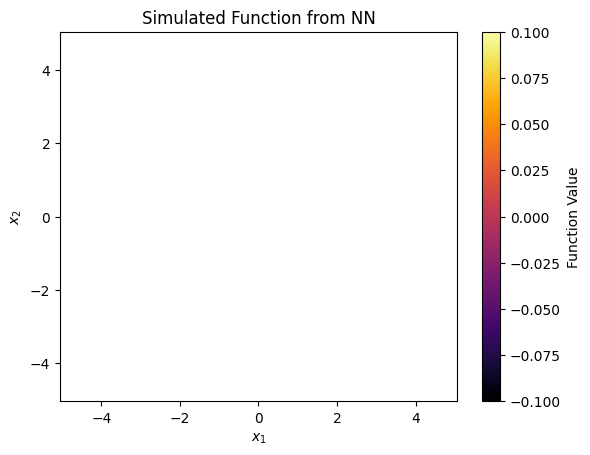

In [13]:
plot_simulated_meshgrid(X, -Y, mesh_results, model='NN')

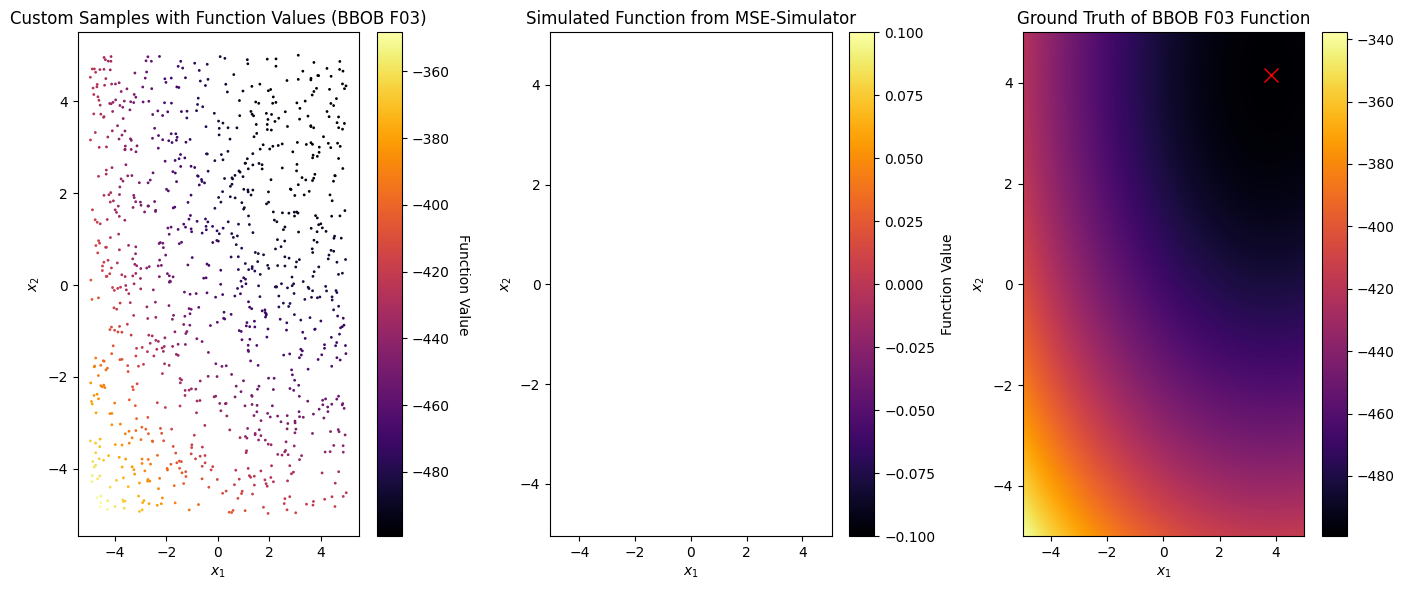

In [14]:
plot_collage(sample_f01[0].detach().numpy(), sample_f01[1].detach().numpy(), problem_f01, "BBOB F03", "MSE-Simulator", X, -Y, mesh_results);

In [15]:
sys.path.append("../")
torch.save(m.state_dict(), "../models/f03_mse_nn_model.pt")

## F24

In [16]:
# create ground truth functions
n_dim = 2
samples = 1000
seed = 42

torch.manual_seed(seed)
problem_f24 = bbobtorch.create_f24(n_dim, seed=seed)
# sampling from groundtruth functions
sample_f24 = gt_sampling.get_sample(problem_f24, n_samples=samples, n_dim=2, seed=42, method='random')
X_input = sample_f24[0]

c:\ProgramData\Anaconda3\envs\python-3-10-env\MachineLearningProjectTest\lib\site-packages\bbobtorch\utils.py:44: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:2431.)
  R, _ = t.qr(R)


## Simulate the function with NN

In [17]:
input_dim = 2
hidden_dim = 16
hidden_layers = 8
output_dim = 1

learning_rate = 1e-4
num_epochs = 1000

m = model.NN1(input_dim, hidden_dim, hidden_layers)
optimizer = torch.optim.SGD(m.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
y = bbobtorch.create_f24(2)(X_input)
mean, std = y.mean(), y.std()
# Training loop
for epoch in range(num_epochs):
    preds = m(X_input)
    preds = preds * std + mean
    Karloss = criterion(preds.flatten(), y.clone().detach().flatten())

    # Backward and optimize
    Karloss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {Karloss.item():.4f}')

Epoch [20/1000], Loss: 347.9957
Epoch [40/1000], Loss: 347.8523
Epoch [60/1000], Loss: 347.7490
Epoch [80/1000], Loss: 347.6288
Epoch [100/1000], Loss: 347.4839
Epoch [120/1000], Loss: 347.3069
Epoch [140/1000], Loss: 347.0869
Epoch [160/1000], Loss: 346.8091
Epoch [180/1000], Loss: 346.4459
Epoch [200/1000], Loss: 345.9565
Epoch [220/1000], Loss: 345.2699
Epoch [240/1000], Loss: 344.2188
Epoch [260/1000], Loss: 342.5379
Epoch [280/1000], Loss: 339.6124
Epoch [300/1000], Loss: 333.5754
Epoch [320/1000], Loss: 317.4034
Epoch [340/1000], Loss: 273.8170
Epoch [360/1000], Loss: 243.0411
Epoch [380/1000], Loss: 230.7693
Epoch [400/1000], Loss: 214.6413
Epoch [420/1000], Loss: 191.9364
Epoch [440/1000], Loss: 166.3174
Epoch [460/1000], Loss: 145.9695
Epoch [480/1000], Loss: 170.1662
Epoch [500/1000], Loss: 159.4193
Epoch [520/1000], Loss: 156.9183
Epoch [540/1000], Loss: 153.4279
Epoch [560/1000], Loss: 151.2153
Epoch [580/1000], Loss: 150.3039
Epoch [600/1000], Loss: 147.0667
Epoch [620/100

In [18]:
# generate mesh grid for plotting
with torch.no_grad():
    x = np.linspace(-5.0, 5.0, 100)
    y = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(x, y)
    mesh_samples = np.c_[X.ravel(), Y.ravel()]
    mesh_samples_tensor = torch.tensor(mesh_samples, dtype=torch.float32)
    mesh_results = m(mesh_samples_tensor).reshape(X.shape)*std + mean
    mesh_results = mesh_results.numpy()[:, ::-1]

<Axes: title={'center': 'Simulated Function from NN'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

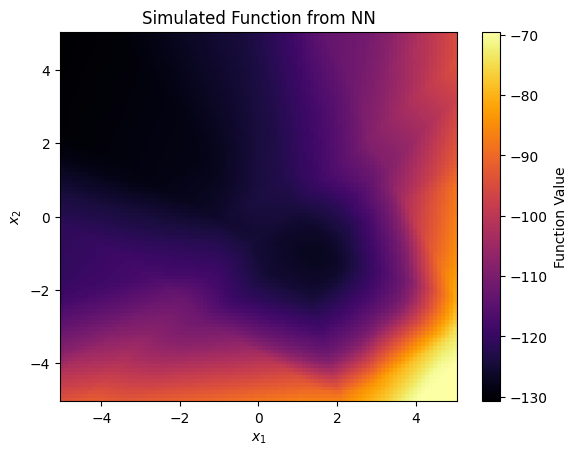

In [19]:
plot_simulated_meshgrid(X, -Y, mesh_results, model='NN')

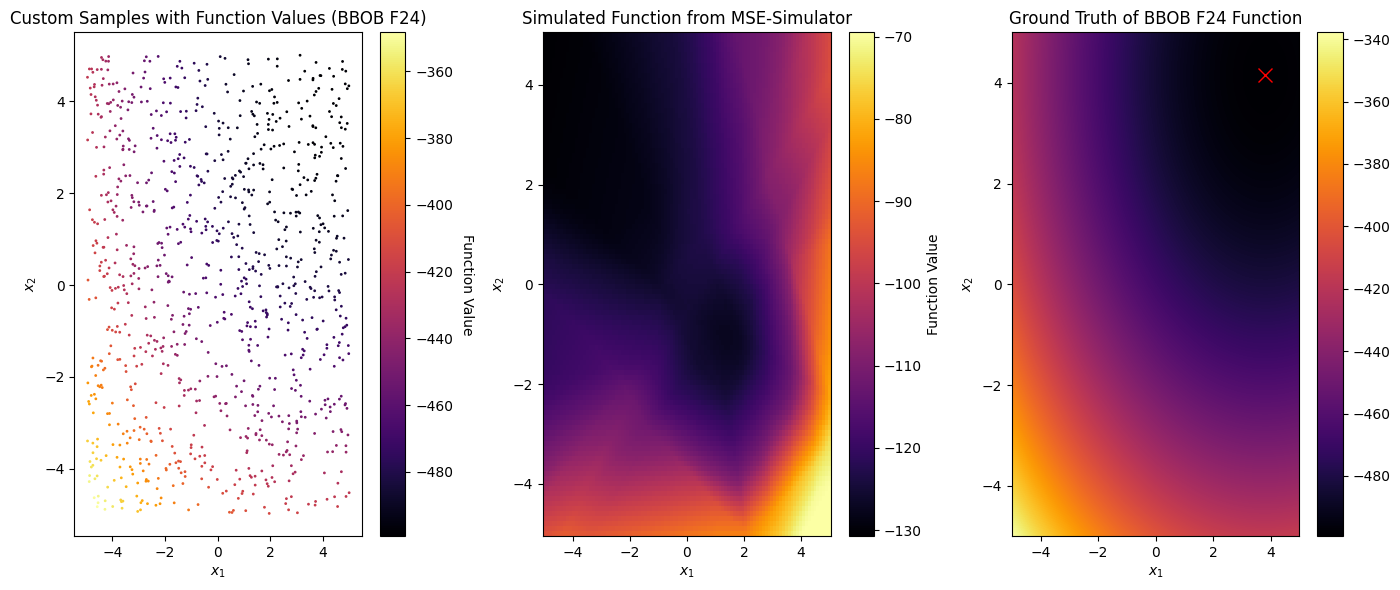

In [20]:
plot_collage(sample_f01[0].detach().numpy(), sample_f01[1].detach().numpy(), problem_f01, "BBOB F24", "MSE-Simulator", X, -Y, mesh_results);

In [21]:
sys.path.append("../")
torch.save(m.state_dict(), "../models/f24_mse_nn_model.pt")

Overall the local structure (ruggedness) can not be represented due to smoothing by the estimators.
The hereby trained models are refered to as "NN-Classic" in the overall evaluation.